# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('website.csv')
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()
websites.dtypes

""" 
Las columnas parecen estar en el formato adecuado. Excepto por dos: WHOIS_REGDATE y WHOIS_UPDATED_DATE

"""

' \nLas columnas parecen estar en el formato adecuado. Excepto por dos: WHOIS_REGDATE y WHOIS_UPDATED_DATE\n\n'

In [4]:
websites.describe()


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [5]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [6]:
websites.WHOIS_REGDATE 

0       10/10/2015 18:21
1                   None
2                   None
3         7/10/1997 4:00
4        12/05/1996 0:00
              ...       
1776     17/09/2008 0:00
1777     17/09/2008 0:00
1778     15/02/1999 0:00
1779      1/04/1998 0:00
1780     14/11/2008 0:00
Name: WHOIS_REGDATE, Length: 1781, dtype: object

In [7]:
websites.isnull().sum()
#Vemos que solo tenemos una columna con MUCHOS nulos, y es la de content length. las otras dos solo tienen 1 nulo.
#Dado que casi la mitad de las observaciones son nulas, me veré forzado a tirarla más adelante. 

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

## Comentario

La base de datos se ve más o menos bien. Solo hay una columna con muchos nulos. La variable que queremos predecir es Type, que solo tiene valores '1' y '0'. Probablemente 1 significa que es un sitio con virus, dado que son la minoría de sitios los que tienen "1" (216 vs. 1565), y en realidad es la minoría de sitios los que tienen virus. 


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [8]:
# Your code here
#websites.corr()
import seaborn as sns

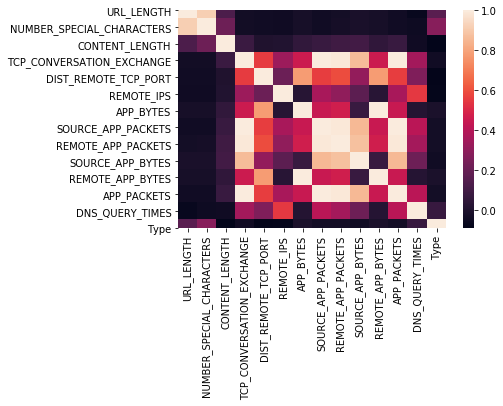

In [9]:
sns.heatmap(websites.corr());

In [10]:
# Your comment here
""" 
En la matriz de correlaciones vemos que los siguientes pares de variables están altamente correlacionados:

(source_app_packets, remote_app_packets)
(app_bytes, remote_app_bytes)
(app_packets, source_app_packets)
(tcp_conversation_exchange, source_app_packets)

etc. etc.
"""

' \nEn la matriz de correlaciones vemos que los siguientes pares de variables están altamente correlacionados:\n\n(source_app_packets, remote_app_packets)\n(app_bytes, remote_app_bytes)\n(app_packets, source_app_packets)\n(tcp_conversation_exchange, source_app_packets)\n\netc. etc.\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [11]:
# Your code here

websites.drop(columns=['REMOTE_APP_BYTES'], inplace=True)

In [12]:
# Your comment here

In [13]:
# Print heatmap again
websites.corr() #Remote APP Packets con APP Packets sigue teniendo correlación superior al 98%; 
#prefiero verlo aquí que en el heatmap

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.857495,0.215285,-0.043852


In [14]:
websites.drop(columns=['REMOTE_APP_PACKETS'], inplace=True)

In [15]:
websites.corr() #source app packets y TCP conversation exchange tienen correlación de .99; se van 

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.014857,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.100094,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.865580,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.857495,1.000000,0.410843,-0.034414
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,1.000000,0.857495,0.215285,-0.043852
APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.857495,1.000000,0.410843,-0.034414


In [16]:
websites.drop(columns=['TCP_CONVERSATION_EXCHANGE'], inplace=True)

In [17]:
websites.corr()>.89 #Number special characters igual está muy correlacionado con URL Length
#Además, dudo que el número de caracteres especiales sea una variable clave para identificar virus maliciosos

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,True,True,False,False,False,False,False,False,False,False,False
NUMBER_SPECIAL_CHARACTERS,True,True,False,False,False,False,False,False,False,False,False
CONTENT_LENGTH,False,False,True,False,False,False,False,False,False,False,False
DIST_REMOTE_TCP_PORT,False,False,False,True,False,False,False,False,False,False,False
REMOTE_IPS,False,False,False,False,True,False,False,False,False,False,False
APP_BYTES,False,False,False,False,False,True,False,False,False,False,False
SOURCE_APP_PACKETS,False,False,False,False,False,False,True,False,True,False,False
SOURCE_APP_BYTES,False,False,False,False,False,False,False,True,False,False,False
APP_PACKETS,False,False,False,False,False,False,True,False,True,False,False
DNS_QUERY_TIMES,False,False,False,False,False,False,False,False,False,True,False


In [18]:
websites.drop(columns=['SOURCE_APP_PACKETS', 'NUMBER_SPECIAL_CHARACTERS'], inplace=True)
websites.corr()>.89
#LISTO. 

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,True,False,False,False,False,False,False,False,False
CONTENT_LENGTH,False,True,False,False,False,False,False,False,False
DIST_REMOTE_TCP_PORT,False,False,True,False,False,False,False,False,False
REMOTE_IPS,False,False,False,True,False,False,False,False,False
APP_BYTES,False,False,False,False,True,False,False,False,False
SOURCE_APP_BYTES,False,False,False,False,False,True,False,False,False
APP_PACKETS,False,False,False,False,False,False,True,False,False
DNS_QUERY_TIMES,False,False,False,False,False,False,False,True,False
Type,False,False,False,False,False,False,False,False,True


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [19]:
# Your code here
websites.isnull().sum()


URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [20]:
# Your code here
websites.drop(columns=['CONTENT_LENGTH'])
websites= websites.dropna()

In [21]:
# Your comment here
"""
Tal como puse arriba, esa columna simplmente tiene la mitad de los registros vacíos. ES UNA BROMA DE COLUMNA.
Lo otro no me preocupa porque solo estamos tirando 2 renglones de 1760.

"""

'\nTal como puse arriba, esa columna simplmente tiene la mitad de los registros vacíos. ES UNA BROMA DE COLUMNA.\nLo otro no me preocupa porque solo estamos tirando 2 renglones de 1760.\n\n'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [22]:
# Examine missing values in each column
websites.isnull().sum()
#Clean

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
CONTENT_LENGTH          0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [23]:
# Your code here
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       "[u'GB'; u'UK']", 'UG', 'JP', 'SI', 'IL', 'AT', 'CN', 'BE', 'NO',
       'TR', 'KY', 'BR', 'SC', 'NL', 'FR', 'CZ', 'KR', 'UA', 'CH', 'HK',
       'United Kingdom', 'DE', 'IT', 'BS', 'SE', 'Cyprus', 'us', 'BY',
       'AE', 'IE', 'PH', 'UY'], dtype=object)

In [24]:
def clean_country(x):
    x = x.replace('Cyprus', 'CY')
    x = x.replace('us', 'US')
    x = x.replace('United Kingdom', 'UK')
    x = x.replace("[u'GB'; u'UK']", 'UK')
    x = x.replace('GB', 'UK')
    x = x.replace('se', 'SE')
    return x

In [25]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(clean_country)

In [26]:
websites.WHOIS_COUNTRY.unique()

array(['None', 'US', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'UG', 'JP',
       'SI', 'IL', 'AT', 'CN', 'BE', 'NO', 'TR', 'KY', 'BR', 'SC', 'NL',
       'FR', 'CZ', 'KR', 'UA', 'CH', 'HK', 'DE', 'IT', 'BS', 'CY', 'BY',
       'AE', 'IE', 'PH', 'UY'], dtype=object)

In [27]:
#Listo.

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [28]:
# Your code here
x = websites.WHOIS_COUNTRY.value_counts()[:11].sum()

#En efecto, los primeros 10 son un muy buen porcentaje. 
print(len(websites.WHOIS_COUNTRY))
print(x)

967
922


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [29]:
# Your code here

top_10 = list(websites.WHOIS_COUNTRY.value_counts()[:10].index)
del(top_10[1]) #quité lo de "None"
top_10


['US', 'CA', 'UK', 'AU', 'PA', 'IN', 'JP', 'CH', 'AT']

In [30]:
def clean_who_is_country(x):
    lista = ['US', 'CA', 'UK', 'AU', 'PA', 'IN', 'CH', 'JP', 'AT']
    
    if x in lista:
        return x
    else:
        x = 'OTHER'
        return x

In [31]:
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(clean_who_is_country)

In [32]:
websites.WHOIS_COUNTRY.value_counts() #Listo

US       591
OTHER    256
CA        45
UK        27
AU        16
PA        10
IN         6
JP         6
CH         6
AT         4
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [33]:
# Your code here

websites.drop(columns= ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)
websites.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [34]:
#Nomás para estar seguro quiero checar la correlación. 

websites.corr() #veo que APP_Packets y APP_Bytes siguen estando muy correlacionadas,y  también source_app_bytes

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.130209,0.071610,0.053408,0.016469,0.012381,0.018902,0.011702,-0.183955
CONTENT_LENGTH,0.130209,1.000000,-0.000420,0.004748,0.051151,0.100060,0.074101,-0.045716,-0.090929
DIST_REMOTE_TCP_PORT,0.071610,-0.000420,1.000000,0.442912,0.314607,0.137946,0.258648,0.453453,-0.136900
REMOTE_IPS,0.053408,0.004748,0.442912,1.000000,0.337006,0.154791,0.334414,0.543964,0.048205
APP_BYTES,0.016469,0.051151,0.314607,0.337006,1.000000,0.931299,0.981002,0.394992,0.022187
SOURCE_APP_BYTES,0.012381,0.100060,0.137946,0.154791,0.931299,1.000000,0.963407,0.169382,-0.036737
APP_PACKETS,0.018902,0.074101,0.258648,0.334414,0.981002,0.963407,1.000000,0.356007,0.017656
DNS_QUERY_TIMES,0.011702,-0.045716,0.453453,0.543964,0.394992,0.169382,0.356007,1.000000,0.283626
Type,-0.183955,-0.090929,-0.136900,0.048205,0.022187,-0.036737,0.017656,0.283626,1.000000


In [35]:
websites.drop(columns= ['SOURCE_APP_BYTES'], inplace=True)

websites.corr()

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.130209,0.071610,0.053408,0.016469,0.018902,0.011702,-0.183955
CONTENT_LENGTH,0.130209,1.000000,-0.000420,0.004748,0.051151,0.074101,-0.045716,-0.090929
DIST_REMOTE_TCP_PORT,0.071610,-0.000420,1.000000,0.442912,0.314607,0.258648,0.453453,-0.136900
REMOTE_IPS,0.053408,0.004748,0.442912,1.000000,0.337006,0.334414,0.543964,0.048205
APP_BYTES,0.016469,0.051151,0.314607,0.337006,1.000000,0.981002,0.394992,0.022187
APP_PACKETS,0.018902,0.074101,0.258648,0.334414,0.981002,1.000000,0.356007,0.017656
DNS_QUERY_TIMES,0.011702,-0.045716,0.453453,0.543964,0.394992,0.356007,1.000000,0.283626
Type,-0.183955,-0.090929,-0.136900,0.048205,0.022187,0.017656,0.283626,1.000000


In [36]:
websites.drop(columns= ['APP_PACKETS'], inplace=True) #sigue estando muy correlacionada con app bytes
 
websites.corr()>.90 #todo bien

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type
URL_LENGTH,True,False,False,False,False,False,False
CONTENT_LENGTH,False,True,False,False,False,False,False
DIST_REMOTE_TCP_PORT,False,False,True,False,False,False,False
REMOTE_IPS,False,False,False,True,False,False,False
APP_BYTES,False,False,False,False,True,False,False
DNS_QUERY_TIMES,False,False,False,False,False,True,False
Type,False,False,False,False,False,False,True


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [37]:
# Your code here
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
CONTENT_LENGTH          float64
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [38]:
# Your code here
websites.drop(columns=['URL'], inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [39]:
# Your code here
websites.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [40]:
# Your code here
websites.SERVER.unique()
"""
Algo que se me ocurre aquí en caliente es hacer split por el guion /, y tomar el elemento a la izquierda.
Así nos daría en genera, Algo como Apache, Oracle, etc. 

Perderíamos un poco de detalle, por ejemplo la versión actual, pero nos ayudaría a tener info más consolidada.


"""

'\nAlgo que se me ocurre aquí en caliente es hacer split por el guion /, y tomar el elemento a la izquierda.\nAsí nos daría en genera, Algo como Apache, Oracle, etc. \n\nPerderíamos un poco de detalle, por ejemplo la versión actual, pero nos ayudaría a tener info más consolidada.\n\n\n'

![Think Hard](../think-hard.jpg)

In [41]:
# Your comment here
#Puse mi solución más arriba, no hubiera estado tan mal según yo. Ahorita checo qué me hubiera dado. 



Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [42]:
# Your code here

def clean_server(x):
    lista = ['Microsoft', 'Apache', 'nginx']
    
    if lista[0] in x:
        x = lista[0]
    elif lista[1] in x:
        x = lista[1]
    elif lista[2] in x:
        x = lista[2]
    else:
        x = "Other"
    
    return x 

In [43]:
websites.SERVER = websites.SERVER.apply(clean_server)

In [57]:
# Count `SERVER` value counts here
websites.SERVER.value_counts() #Listo

Apache       401
Other        221
Microsoft    180
nginx        165
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [58]:
websites.dtypes

URL_LENGTH                int64
CHARSET                  object
SERVER                   object
CONTENT_LENGTH          float64
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

In [59]:
# Your code here

website_dummy = pd.get_dummies(data=websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [61]:
# Your code here

website_dummy.head()
website_dummy.dtypes

URL_LENGTH                int64
CONTENT_LENGTH          float64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
SERVER_Microsoft          uint8
SERVER_Other              uint8
SERVER_nginx              uint8
WHOIS_COUNTRY_AU          uint8
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_CH          uint8
WHOIS_COUNTRY_IN          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_OTHER       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [65]:
y = website_dummy.Type
X = website_dummy.sub(y, axis=0)


In [66]:
X.columns

Index(['URL_LENGTH', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'DNS_QUERY_TIMES', 'Type', 'CHARSET_ISO-8859-1',
       'CHARSET_None', 'CHARSET_UTF-8', 'CHARSET_iso-8859-1',
       'CHARSET_us-ascii', 'CHARSET_utf-8', 'CHARSET_windows-1251',
       'SERVER_Microsoft', 'SERVER_Other', 'SERVER_nginx', 'WHOIS_COUNTRY_AU',
       'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CH', 'WHOIS_COUNTRY_IN',
       'WHOIS_COUNTRY_JP', 'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA',
       'WHOIS_COUNTRY_UK', 'WHOIS_COUNTRY_US'],
      dtype='object')

In [67]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [68]:
# Your code here:

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=200)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [69]:
# Your code here:

logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [70]:
# Your code here:
from sklearn.metrics import confusion_matrix

y_pred_test = logistic_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[169,   0],
       [  0,  25]])

In [76]:
logistic_model.score(X_test, y_test)

1.0

What are your thoughts on the performance of the model? Write your conclusions below.

In [71]:
# Your conclusions here:
"""
Bueno, está muy loco que tiene un 100% de precisión. Recordemos que
el segundo y tercer elemento marcan los errores.

Pensaríamos que es un problema de over-fitting, pero en realidad esto ocurrió con datos nuevos;
por eso me sorprende. 

"""

'\nBueno, está muy loco que tiene un 100% de precisión. Recordemos que\nel segundo y tercer elemento marcan los errores.\n\nPensaríamos que es un problema de over-fitting, pero en realidad esto ocurrió con datos nuevos;\npor eso me sorprende. \n\n'

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [72]:
# Your code here:

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(n_neighbors=3)
KNC.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [75]:
# Your code here:
y_pred_kneighbors = KNC.predict(X_test)
confusion_matrix(y_test, y_pred_kneighbors)
KNC.score(X_test, y_test) #90%

0.9072164948453608

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [77]:
# Your code here:
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(X_train, y_train)
y_pred_kneighbors = KNC.predict(X_test)
confusion_matrix(y_test, y_pred_kneighbors)
KNC.score(X_test, y_test)


0.9072164948453608

In [78]:
KNC.score(X_test, y_test)

0.9072164948453608

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [55]:
# Your conclusions here:
"""
No vi ninguna mejora. Esto debe ser por un aspecto técnico del modelo que aún no capto al 100
porque no me he sentado a estudiar cómo funciona por dentro. 


"""

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [82]:
# Your code here

from sklearn.preprocessing import RobustScaler 

X_train = RobustScaler().fit_transform(X_train)
X_test = RobustScaler().fit_transform(X_test)

In [83]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=200)

logistic_model.fit(X_train, y_train)

y_pred_test = logistic_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[169,   0],
       [  0,  25]])

In [84]:
logistic_model.score(X_test, y_test)

1.0

In [ ]:
#De nuevo un 100%. Conviene normalizar o reescalar entonces!